In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score

In [2]:
import os
import numpy as np
import pandas as pd
import more_itertools as mit
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
house_data = pd.read_csv("../preprocessed_data/clean_data1.csv")

In [4]:
house_data.head()

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,Month,DayOfWeek,HourofDay,Day,...,T_stp_heat,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
0,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,0.0,165.0,70.0,0.0,67.0,0.0,41.0,95.0
1,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,30.0,135.0,70.0,0.0,67.0,0.0,41.0,95.0
2,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,300.0,300.0,70.0,0.0,67.0,0.0,41.0,95.0
3,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,135.0,180.0,70.0,0.0,67.0,0.0,41.0,95.0
4,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,0.0,120.0,70.0,0.0,67.0,0.0,41.0,95.0


In [5]:
house_data.drop(labels = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'Month', 'DayOfWeek', 'Day',
                          'HourofDay', 'HvacMode', 'Event', 'Schedule', 'Humidity', 'fan', 'Thermostat_Temperature', 
                          'Thermostat_Motion', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion'], axis = 1, inplace = True)

In [6]:
house_data.head()

,T_ctrl,T_stp_heat,auxHeat1,T_out,RH_out
0,70.0,70.0,0.0,41.0,95.0
1,70.0,70.0,30.0,41.0,95.0
2,70.0,70.0,300.0,41.0,95.0
3,70.0,70.0,135.0,41.0,95.0
4,70.0,70.0,0.0,41.0,95.0


In [7]:
house_data = house_data[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out', 'auxHeat1']]

In [8]:
house_data.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.0,70.0,41.0,95.0,0.0
1,70.0,70.0,41.0,95.0,30.0
2,70.0,70.0,41.0,95.0,300.0
3,70.0,70.0,41.0,95.0,135.0
4,70.0,70.0,41.0,95.0,0.0


In [9]:
house_data.auxHeat1.value_counts().index

Float64Index([  0.0, 300.0,  90.0, 225.0, 180.0,  15.0, 120.0,  30.0, 240.0,
              270.0,  60.0,  45.0, 105.0,  75.0, 150.0, 135.0, 195.0, 285.0,
              165.0, 210.0, 255.0],
             dtype='float64')

In [10]:
house_data.auxHeat1.value_counts().values

array([42159,  9472,   421,   405,   404,   403,   394,   393,   385,
         382,   380,   378,   376,   375,   368,   368,   367,   360,
         357,   349,   341], dtype=int64)

[Text(0, 0.5, 'Percentage Values'), Text(0.5, 0, 'Target Variable Values')]

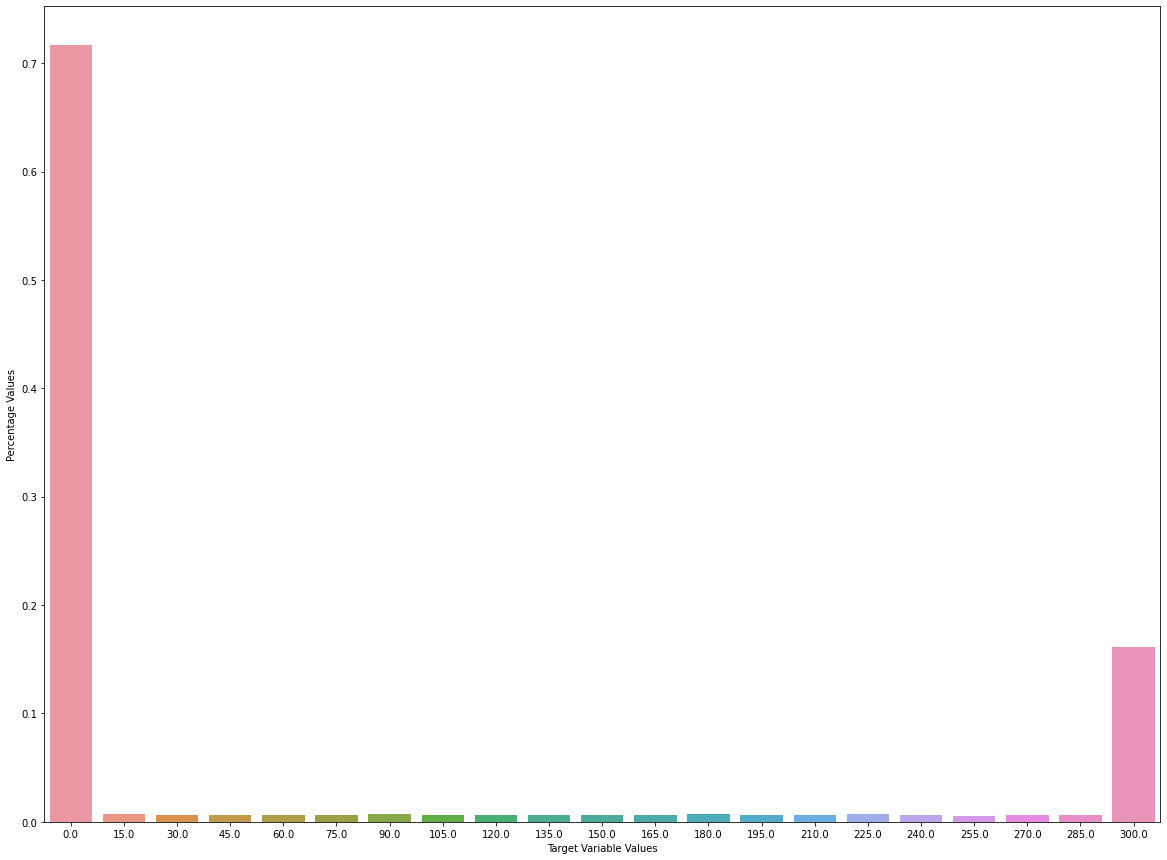

In [11]:
plt.figure(figsize = (20, 15))
ax = sns.barplot(x = house_data.auxHeat1.value_counts().index, y = house_data.auxHeat1.value_counts(normalize = True).values)
ax.set(xlabel = 'Target Variable Values', ylabel = 'Percentage Values')

[Text(0.5, 0, 'Target Variable Values')]

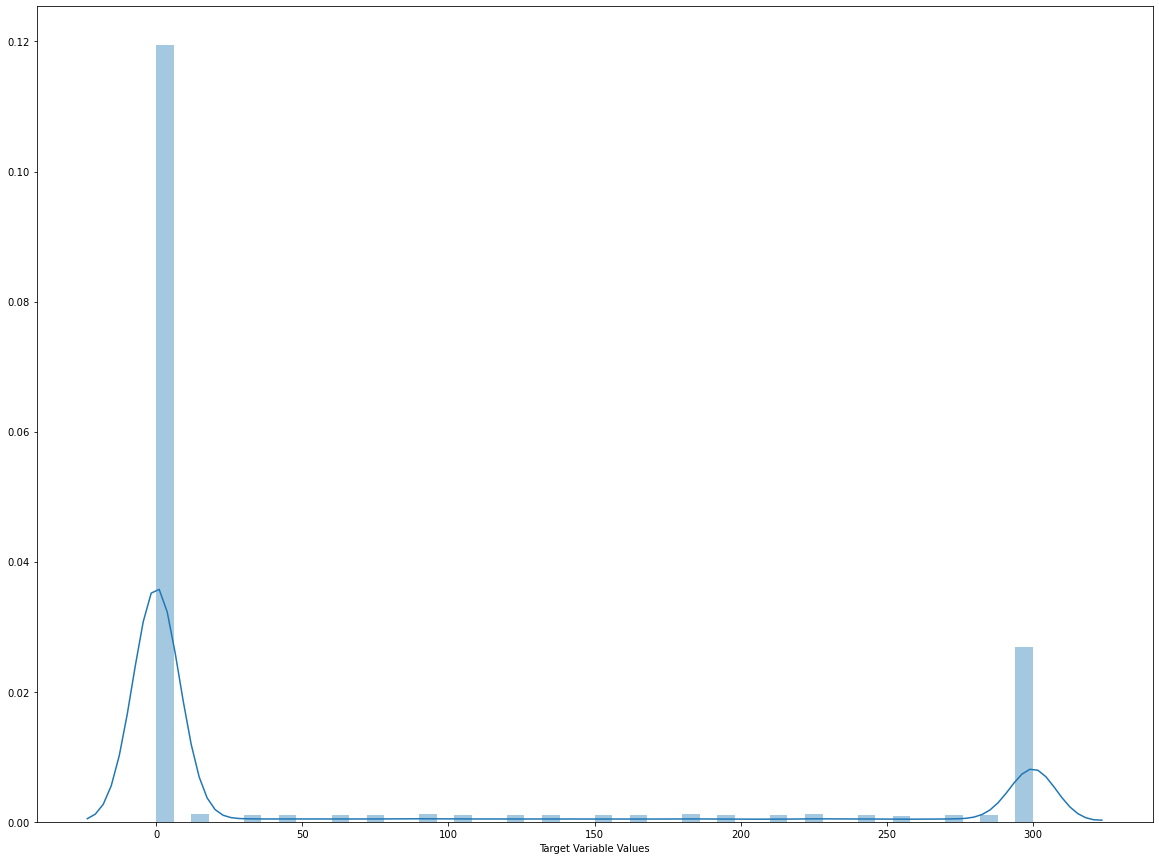

In [12]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_data.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [13]:
list(range(0, 13))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [14]:
len(house_data)

58837

In [15]:
start, end = 0, len(house_data)

cur = 0
ls = list()
step = 24
while start <= end - step:
    cur = start + step
    print(cur)
    
    ls.append(list(range(start, cur)))
    
    start = cur

24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720
744
768
792
816
840
864
888
912
936
960
984
1008
1032
1056
1080
1104
1128
1152
1176
1200
1224
1248
1272
1296
1320
1344
1368
1392
1416
1440
1464
1488
1512
1536
1560
1584
1608
1632
1656
1680
1704
1728
1752
1776
1800
1824
1848
1872
1896
1920
1944
1968
1992
2016
2040
2064
2088
2112
2136
2160
2184
2208
2232
2256
2280
2304
2328
2352
2376
2400
2424
2448
2472
2496
2520
2544
2568
2592
2616
2640
2664
2688
2712
2736
2760
2784
2808
2832
2856
2880
2904
2928
2952
2976
3000
3024
3048
3072
3096
3120
3144
3168
3192
3216
3240
3264
3288
3312
3336
3360
3384
3408
3432
3456
3480
3504
3528
3552
3576
3600
3624
3648
3672
3696
3720
3744
3768
3792
3816
3840
3864
3888
3912
3936
3960
3984
4008
4032
4056
4080
4104
4128
4152
4176
4200
4224
4248
4272
4296
4320
4344
4368
4392
4416
4440
4464
4488
4512
4536
4560
4584
4608
4632
4656
4680
4704
4728
4752
4776
4800
4824
4848
4872
4896
4920
4944
4968
4992
5016


47208
47232
47256
47280
47304
47328
47352
47376
47400
47424
47448
47472
47496
47520
47544
47568
47592
47616
47640
47664
47688
47712
47736
47760
47784
47808
47832
47856
47880
47904
47928
47952
47976
48000
48024
48048
48072
48096
48120
48144
48168
48192
48216
48240
48264
48288
48312
48336
48360
48384
48408
48432
48456
48480
48504
48528
48552
48576
48600
48624
48648
48672
48696
48720
48744
48768
48792
48816
48840
48864
48888
48912
48936
48960
48984
49008
49032
49056
49080
49104
49128
49152
49176
49200
49224
49248
49272
49296
49320
49344
49368
49392
49416
49440
49464
49488
49512
49536
49560
49584
49608
49632
49656
49680
49704
49728
49752
49776
49800
49824
49848
49872
49896
49920
49944
49968
49992
50016
50040
50064
50088
50112
50136
50160
50184
50208
50232
50256
50280
50304
50328
50352
50376
50400
50424
50448
50472
50496
50520
50544
50568
50592
50616
50640
50664
50688
50712
50736
50760
50784
50808
50832
50856
50880
50904
50928
50952
50976
51000
51024
51048
51072
51096
51120
51144
51168
5119

In [16]:
df1 = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

In [17]:
df2 = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

In [18]:
for i in ls:
    dummy, n = pd.DataFrame(house_data.iloc[i].sum()).T, len(i)
    print(n)
    dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] = dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] / n
    df2 = df2.append(dummy, ignore_index = True)

24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
2

In [19]:
len(ls)

2451

In [20]:
len(df2)

2451

In [21]:
df2.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.000000,70.0,41.75,94.75,2025.0
1,70.000000,70.0,40.00,91.00,3015.0
2,70.000000,70.0,32.25,74.50,3270.0
3,70.000000,70.0,30.50,72.50,1935.0
4,69.958333,70.0,29.50,70.75,2430.0


In [22]:
house_df = df2.copy()

In [23]:
house_df.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.000000,70.0,41.75,94.75,2025.0
1,70.000000,70.0,40.00,91.00,3015.0
2,70.000000,70.0,32.25,74.50,3270.0
3,70.000000,70.0,30.50,72.50,1935.0
4,69.958333,70.0,29.50,70.75,2430.0


[Text(0.5, 0, 'Target Variable Values')]

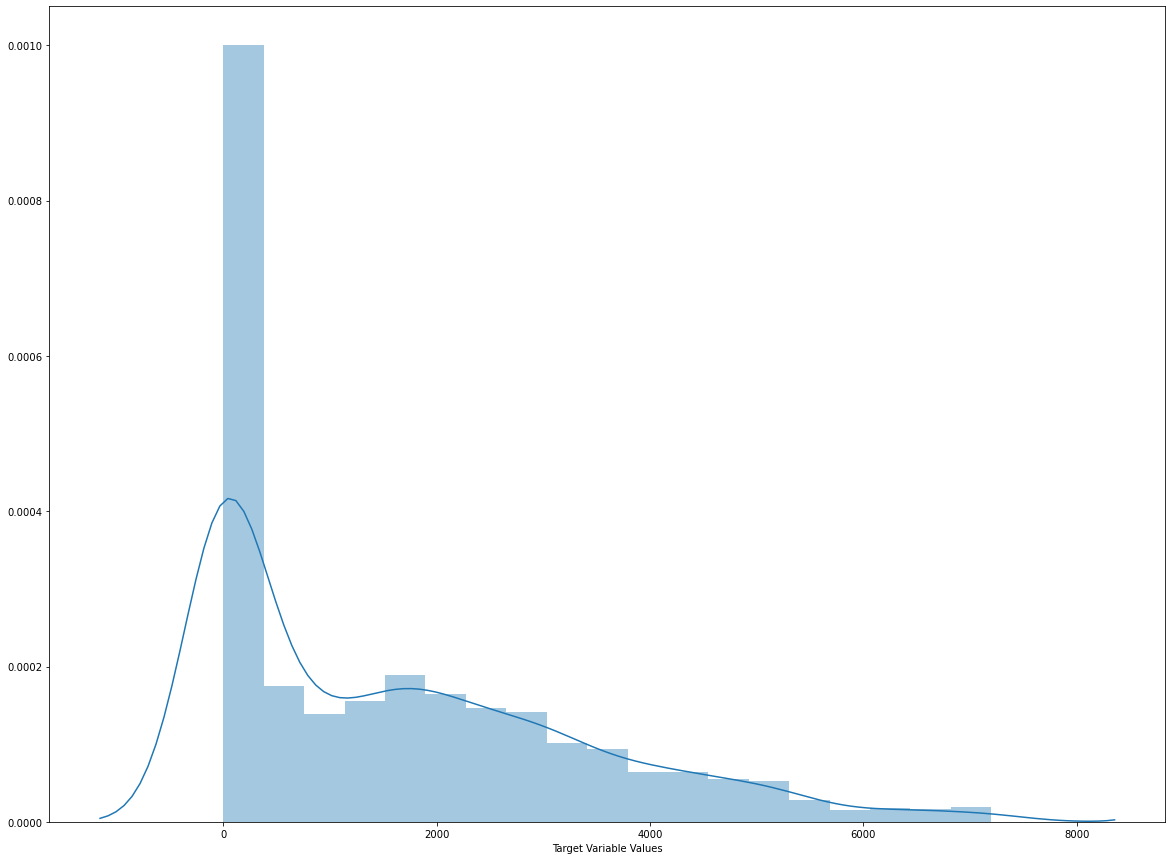

In [24]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_df.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

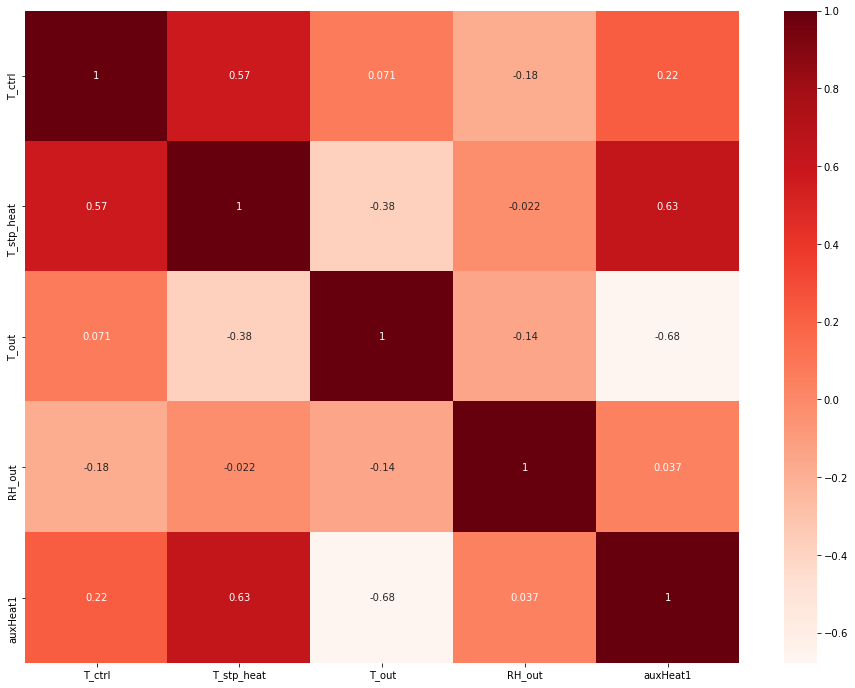

In [25]:
plt.figure(figsize = (16,12))
cor = house_df.corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

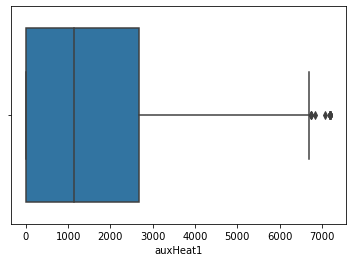

In [26]:
sns.boxplot(house_df.auxHeat1)

In [27]:
Q1 = house_df.auxHeat1.quantile(0.25)
Q3 = house_df.auxHeat1.quantile(0.75)
IQR = Q3 - Q1

In [28]:
((house_df.auxHeat1 < (Q1 - 1.5 * IQR)) | (house_df.auxHeat1 > (Q3 + 1.5 * IQR))).sum()

21

In [29]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(house_df))
print(z)

[[0.31990295 0.69134583 0.05854196 1.83557312 0.24845816]
 [0.31990295 0.69134583 0.05707516 1.57026183 0.82009922]
 [0.31990295 0.69134583 0.56909384 0.40289214 0.96734009]
 ...
 [0.31990295 0.69134583 0.51954365 0.22307004 0.00271746]
 [0.31990295 0.69134583 0.6764526  0.61219327 0.92080764]
 [0.31990295 0.69134583 0.75353068 0.41468375 0.11853974]]


In [30]:
threshold = 3
print(np.where(z > 3))

(array([ 148,  184,  185,  186,  187,  190,  239,  271,  273,  273,  274,
        274,  281,  285,  384,  465,  896,  897,  898,  899,  900,  901,
        902,  903,  904,  905,  906,  907,  908,  909,  910,  911,  912,
        913,  914,  915,  916,  917,  918,  919,  920,  921,  926,  927,
        928,  929,  930,  931,  932,  933,  934,  935,  936,  937,  938,
        939,  940,  941,  942,  943,  944,  945,  946,  947,  948,  949,
        950,  951,  952, 1590, 1591, 1591, 1592, 1593, 1594, 1595, 1596,
       1597, 1598, 1599, 1600, 1983, 2141, 2310, 2321], dtype=int64), array([4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4],
      dtype=int64))


In [31]:
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

T_ctrl           2.833333
T_stp_heat       6.062500
T_out           20.562500
RH_out          20.750000
auxHeat1      2685.000000
dtype: float64


In [32]:
house_df_o = house_df[(z < 3).all(axis=1)]

In [33]:
house_df.shape

(2451, 5)

In [34]:
house_df_o.shape

(2369, 5)

In [35]:
house_df_out = house_df[~((house_df < (Q1 - 1.5 * IQR)) | (house_df > (Q3 + 1.5 * IQR))).any(axis = 1)]
house_df_out.shape

(2253, 5)

In [36]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from neupy import algorithms

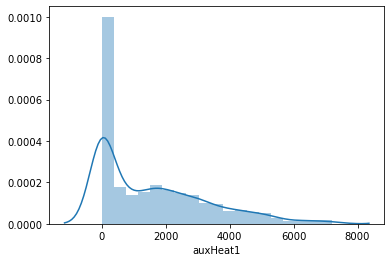

In [37]:
sns.distplot(house_df.auxHeat1)

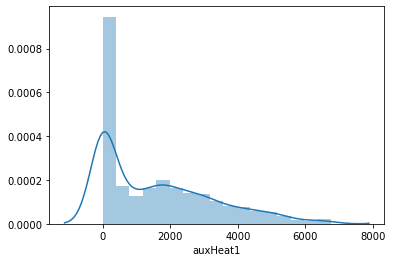

In [38]:
sns.distplot(house_df_o.auxHeat1)

[Text(0.5, 0, 'Target Variable Values')]

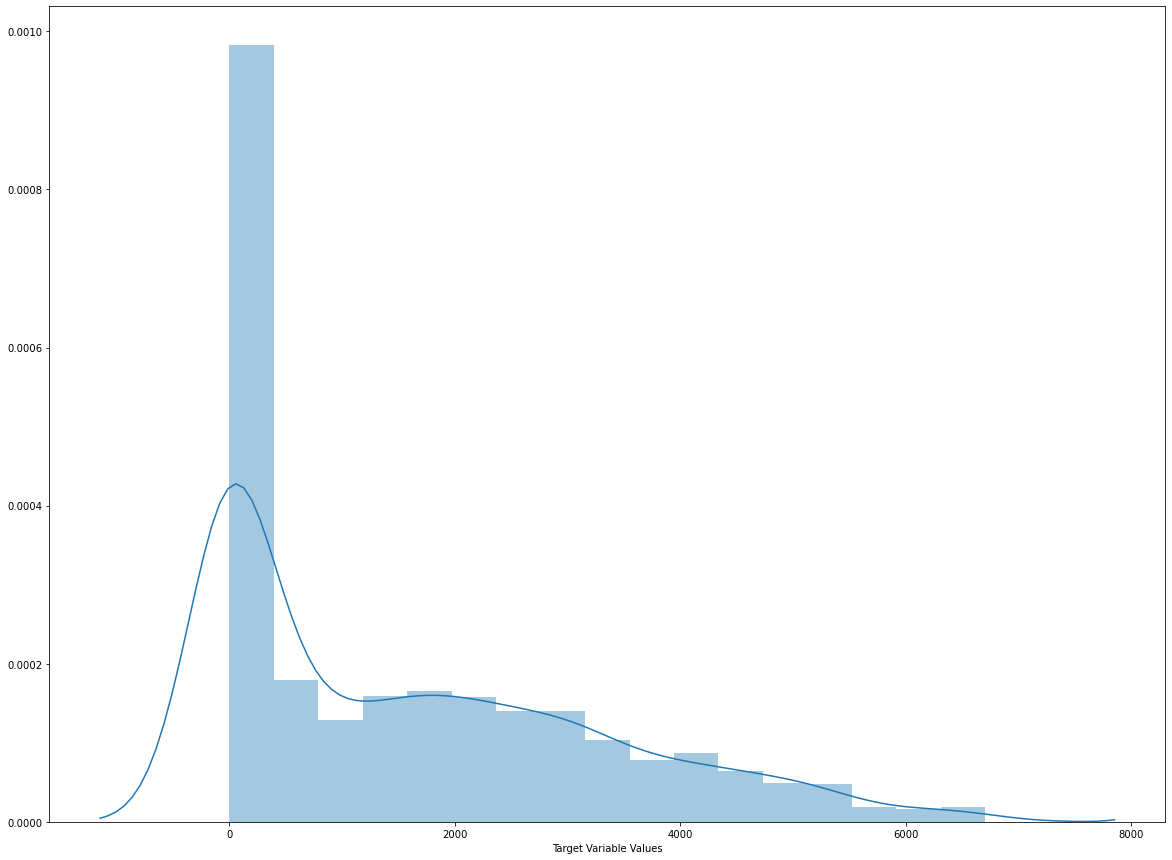

In [39]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_df_out.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [87]:
# def f(row):
#     if row['auxHeat1'] == 0.0:
#         val = 0
#     else:
#         val = 1
#     return val

In [88]:
# house_df_out['label'] = house_df_out.apply(f, axis = 1)

In [40]:
house_df_out.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.000000,70.0,41.75,94.75,2025.0
1,70.000000,70.0,40.00,91.00,3015.0
2,70.000000,70.0,32.25,74.50,3270.0
3,70.000000,70.0,30.50,72.50,1935.0
4,69.958333,70.0,29.50,70.75,2430.0


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc = StandardScaler()

In [43]:
house_df_out[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] = sc.fit_transform(house_df_out[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']])

In [93]:
#house_df_out_1 = house_df_out[house_df_out['label'] == 1]

In [44]:
X, y = house_df_out.drop(labels = ['auxHeat1'], axis = 1), house_df_out['auxHeat1']

In [45]:
y.head()

0    2025.0
1    3015.0
2    3270.0
3    1935.0
4    2430.0
Name: auxHeat1, dtype: float64

In [46]:
y = y.values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
X_train.shape

(1802, 4)

In [49]:
X_train

,T_ctrl,T_stp_heat,T_out,RH_out
477,1.613181,1.466142,-1.090444,0.559651
962,-0.277190,0.367073,0.236410,1.630949
1363,0.045032,-0.457229,1.288356,1.231838
829,0.195402,0.367073,1.265915,-0.370608
2186,0.216884,0.641840,-0.411588,1.426892
...,...,...,...,...
1874,-0.298672,0.367073,0.068099,-1.045796
1026,1.247996,1.191375,0.171891,-0.397615
1246,0.603551,0.641840,1.041500,-1.195837
2173,0.216884,0.641840,-0.955795,0.196550


In [50]:
y_train.shape

(1802,)

In [51]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'normal', activation = 'relu', input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 16, epochs = 200, shuffle = True)

Epoch 1/200
113/113 [==============================] - 1s 5ms/step - loss: 1564.6027 - mse: 5272434.0000 - val_loss: 1595.9510 - val_mse: 5528739.5000
Epoch 2/200
113/113 [==============================] - 0s 4ms/step - loss: 1563.0581 - mse: 5262623.5000 - val_loss: 1592.4351 - val_mse: 5505569.0000
Epoch 3/200
113/113 [==============================] - 0s 4ms/step - loss: 1556.5820 - mse: 5220999.0000 - val_loss: 1581.5668 - val_mse: 5434236.5000
Epoch 4/200
113/113 [==============================] - 0s 4ms/step - loss: 1541.4132 - mse: 5125752.5000 - val_loss: 1559.9188 - val_mse: 5293844.5000
Epoch 5/200
113/113 [==============================] - 0s 4ms/step - loss: 1514.5916 - mse: 4957203.0000 - val_loss: 1524.2279 - val_mse: 5067407.0000
Epoch 6/200
113/113 [==============================] - 0s 4ms/step - loss: 1473.2461 - mse: 4706569.5000 - val_loss: 1472.5244 - val_mse: 4749252.0000
Epoch 7/200
113/113 [==============================] - 0s 4ms/step - loss: 1415.4648 - mse: 43

113/113 [==============================] - 0s 3ms/step - loss: 533.3627 - mse: 749830.3750 - val_loss: 579.1722 - val_mse: 762707.4375
Epoch 57/200
113/113 [==============================] - 0s 4ms/step - loss: 532.4285 - mse: 747651.7500 - val_loss: 577.9924 - val_mse: 759591.8750
Epoch 58/200
113/113 [==============================] - 0s 3ms/step - loss: 531.4034 - mse: 745396.3750 - val_loss: 576.5416 - val_mse: 756815.9375
Epoch 59/200
113/113 [==============================] - 0s 3ms/step - loss: 530.4999 - mse: 743957.8125 - val_loss: 575.2026 - val_mse: 754113.3750
Epoch 60/200
113/113 [==============================] - 0s 3ms/step - loss: 529.7880 - mse: 741700.0000 - val_loss: 573.8719 - val_mse: 751494.5000
Epoch 61/200
113/113 [==============================] - 0s 3ms/step - loss: 528.7562 - mse: 739234.6875 - val_loss: 572.3567 - val_mse: 748709.0625
Epoch 62/200
113/113 [==============================] - 0s 3ms/step - loss: 527.7843 - mse: 737077.8125 - val_loss: 571.5449 

113/113 [==============================] - 0s 3ms/step - loss: 489.9304 - mse: 646048.3750 - val_loss: 509.9685 - val_mse: 607190.6875
Epoch 167/200
113/113 [==============================] - 0s 3ms/step - loss: 489.3180 - mse: 644756.2500 - val_loss: 509.7922 - val_mse: 606051.7500
Epoch 168/200
113/113 [==============================] - 0s 3ms/step - loss: 489.1375 - mse: 644588.2500 - val_loss: 508.9168 - val_mse: 605497.0000
Epoch 169/200
113/113 [==============================] - 0s 3ms/step - loss: 488.8531 - mse: 643576.1875 - val_loss: 509.1201 - val_mse: 604391.5000
Epoch 170/200
113/113 [==============================] - 0s 3ms/step - loss: 488.6252 - mse: 642992.3750 - val_loss: 508.7140 - val_mse: 603203.5000
Epoch 171/200
113/113 [==============================] - 0s 3ms/step - loss: 488.3608 - mse: 642087.6875 - val_loss: 508.6900 - val_mse: 602250.3125
Epoch 172/200
113/113 [==============================] - 0s 3ms/step - loss: 488.3058 - mse: 642469.5625 - val_loss: 507

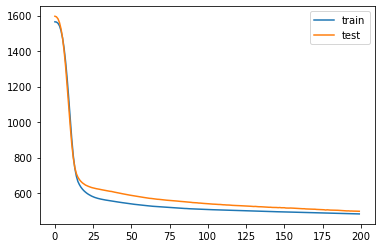

In [52]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [53]:
y_predicted = classifier.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error

In [56]:
mean_absolute_error(y_test, y_predicted)

497.1111027211779

In [58]:
y_test[2]

0.0

In [57]:
y_predicted[2]

array([0.00098958], dtype=float32)

In [59]:
for i in range(len(y_predicted)):
    if int(np.absolute(y_predicted[i])) == 0:
        y_predicted[i] = 0

In [60]:
y_predicted[2]

array([0.], dtype=float32)

In [61]:
mean_absolute_error(y_test, y_predicted)

497.11092060368236

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y_test, y_predicted)

577405.3407691987

In [65]:
np.sqrt(mean_squared_error(y_test, y_predicted))

759.8719239248143

In [66]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [67]:
house_df_out

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,0.216884,0.64184,0.037242,1.898023,2025.0
1,0.216884,0.64184,-0.080576,1.627948,3015.0
2,0.216884,0.64184,-0.602341,0.439618,3270.0
3,0.216884,0.64184,-0.720159,0.295578,1935.0
4,0.195402,0.64184,-0.787484,0.169542,2430.0
...,...,...,...,...,...
2446,0.195402,0.64184,-0.647224,1.051788,1830.0
2447,0.195402,0.64184,-0.574289,0.262568,1590.0
2448,0.216884,0.64184,-0.551848,0.256567,1590.0
2449,0.216884,0.64184,-0.711744,0.652677,0.0


In [68]:
reframed = series_to_supervised(house_df_out, 2, 1)

In [69]:
reframed

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
2,0.216884,0.64184,0.037242,1.898023,2025.0,0.216884,0.64184,-0.080576,1.627948,3015.0,0.216884,0.64184,-0.602341,0.439618,3270.0
3,0.216884,0.64184,-0.080576,1.627948,3015.0,0.216884,0.64184,-0.602341,0.439618,3270.0,0.216884,0.64184,-0.720159,0.295578,1935.0
4,0.216884,0.64184,-0.602341,0.439618,3270.0,0.216884,0.64184,-0.720159,0.295578,1935.0,0.195402,0.64184,-0.787484,0.169542,2430.0
5,0.216884,0.64184,-0.720159,0.295578,1935.0,0.195402,0.64184,-0.787484,0.169542,2430.0,0.345773,0.64184,-0.854808,-0.172553,1590.0
6,0.195402,0.64184,-0.787484,0.169542,2430.0,0.345773,0.64184,-0.854808,-0.172553,1590.0,0.216884,0.64184,-1.006288,-0.028513,2325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,0.195402,0.64184,-0.383536,0.889743,1575.0,0.195402,0.64184,-0.490134,1.276850,2025.0,0.195402,0.64184,-0.647224,1.051788,1830.0
2447,0.195402,0.64184,-0.490134,1.276850,2025.0,0.195402,0.64184,-0.647224,1.051788,1830.0,0.195402,0.64184,-0.574289,0.262568,1590.0
2448,0.195402,0.64184,-0.647224,1.051788,1830.0,0.195402,0.64184,-0.574289,0.262568,1590.0,0.216884,0.64184,-0.551848,0.256567,1590.0
2449,0.195402,0.64184,-0.574289,0.262568,1590.0,0.216884,0.64184,-0.551848,0.256567,1590.0,0.216884,0.64184,-0.711744,0.652677,0.0


In [70]:
y_auxHeat = reframed['var5(t)']

In [71]:
X = reframed.drop(labels = ["var5(t)"], axis = 1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size = 0.2, shuffle = True)

In [73]:
X_train = X_train.values
X_test = X_test.values

In [74]:
y_train = y_train.values

In [75]:
y_test = y_test.values

In [76]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1800, 14) (1800,) (451, 14) (451,)


In [77]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 12, kernel_initializer = 'normal', activation = 'relu', input_dim = 14))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 200, shuffle = True)

Epoch 1/200
57/57 [==============================] - 0s 7ms/step - loss: 1571.7302 - mean_absolute_error: 1571.7302 - val_loss: 1438.6105 - val_mean_absolute_error: 1438.6105
Epoch 2/200
57/57 [==============================] - 0s 4ms/step - loss: 1399.5155 - mean_absolute_error: 1399.5155 - val_loss: 1100.3744 - val_mean_absolute_error: 1100.3744
Epoch 3/200
57/57 [==============================] - 0s 4ms/step - loss: 939.8487 - mean_absolute_error: 939.8487 - val_loss: 796.6924 - val_mean_absolute_error: 796.6924
Epoch 4/200
57/57 [==============================] - 0s 4ms/step - loss: 815.9503 - mean_absolute_error: 815.9503 - val_loss: 785.2855 - val_mean_absolute_error: 785.2855
Epoch 5/200
57/57 [==============================] - 0s 4ms/step - loss: 801.1291 - mean_absolute_error: 801.1291 - val_loss: 777.3771 - val_mean_absolute_error: 777.3771
Epoch 6/200
57/57 [==============================] - 0s 4ms/step - loss: 793.0513 - mean_absolute_error: 793.0513 - val_loss: 776.3914 - 

Epoch 96/200
57/57 [==============================] - 0s 3ms/step - loss: 750.3357 - mean_absolute_error: 750.3357 - val_loss: 748.2249 - val_mean_absolute_error: 748.2249
Epoch 97/200
57/57 [==============================] - 0s 3ms/step - loss: 750.0530 - mean_absolute_error: 750.0530 - val_loss: 750.3900 - val_mean_absolute_error: 750.3900
Epoch 98/200
57/57 [==============================] - 0s 4ms/step - loss: 752.0177 - mean_absolute_error: 752.0177 - val_loss: 756.5599 - val_mean_absolute_error: 756.5599
Epoch 99/200
57/57 [==============================] - 0s 4ms/step - loss: 748.4220 - mean_absolute_error: 748.4220 - val_loss: 746.8743 - val_mean_absolute_error: 746.8743
Epoch 100/200
57/57 [==============================] - 0s 4ms/step - loss: 750.6272 - mean_absolute_error: 750.6272 - val_loss: 746.8584 - val_mean_absolute_error: 746.8584
Epoch 101/200
57/57 [==============================] - 0s 4ms/step - loss: 748.8510 - mean_absolute_error: 748.8510 - val_loss: 745.1414 - 

57/57 [==============================] - 0s 4ms/step - loss: 721.5999 - mean_absolute_error: 721.5999 - val_loss: 712.9944 - val_mean_absolute_error: 712.9944
Epoch 191/200
57/57 [==============================] - 0s 3ms/step - loss: 718.6361 - mean_absolute_error: 718.6361 - val_loss: 726.2568 - val_mean_absolute_error: 726.2568
Epoch 192/200
57/57 [==============================] - 0s 3ms/step - loss: 717.7604 - mean_absolute_error: 717.7604 - val_loss: 714.6097 - val_mean_absolute_error: 714.6097
Epoch 193/200
57/57 [==============================] - 0s 4ms/step - loss: 720.7914 - mean_absolute_error: 720.7914 - val_loss: 714.5613 - val_mean_absolute_error: 714.5613
Epoch 194/200
57/57 [==============================] - 0s 4ms/step - loss: 721.1284 - mean_absolute_error: 721.1284 - val_loss: 711.1370 - val_mean_absolute_error: 711.1370
Epoch 195/200
57/57 [==============================] - 0s 3ms/step - loss: 720.1759 - mean_absolute_error: 720.1759 - val_loss: 713.6072 - val_mean_a

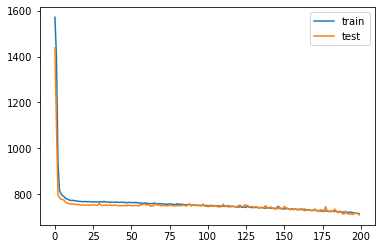

In [78]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
y_predicted = classifier.predict(X_test)

In [81]:
mean_squared_error(y_test, y_predicted)

1370798.211694332

In [82]:
np.sqrt(mean_squared_error(y_test, y_predicted))

1170.8109205564886